In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import sys
import torch
import pandas as pd 

import pickle
sys.path.insert(0, './../../modules')

from Utils import running_mean as rm
from Utils import one_hot_state, onehot_state_collection, twoD_states

# import representation type
from Agents.RepresentationLearning import PlaceCells
# import actor critic network
from Agents.Networks import ActorCritic as Network
# import agent class wrapper to handle behaviour
from Agents import Agent
# import experiment class to handle run and logging
from Experiments import expt


# get environment
import gym
sys.path.append('../../../basic/')
sys.path.append('../../../')

from Agents.EpisodicMemory import EpisodicMemory as Memory


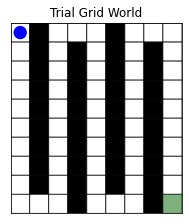

In [2]:
# make env
env_name = 'gym_grid:gridworld-v6'
env = gym.make(env_name)
plt.show()

In [3]:
oh_state_reps = {}
    
place_cells = PlaceCells(env.shape, env.nstates, field_size=0.1)
pc_state_reps = {}

for state in env.useable:
    oh_state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))
    pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]

input_dims = len(oh_state_reps[list(oh_state_reps.keys())[0]])

In [ ]:
print(oh_state_reps[0])

In [ ]:
## onehot state representations
for _ in range(4):
    env.random_start=True
    oh_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    oh_agent = Agent(oh_network, state_representations=oh_state_reps)

    ex = expt(oh_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'onehot_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename)

In [5]:
## place cell representations
for _ in range(5):
    env.random_start = True
    pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    pc_agent = Agent(pc_network, state_representations=pc_state_reps)

    ex = expt(pc_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'place_cell_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'
    
    ex.data['place_cells'] = place_cells
    
    extras = [place_cells.field_size]

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

Episode: 0, Score: 8.649999999999999 (Running Avg:8.649999999999999) [0.1223442554473877s]
Episode: 100, Score: 9.99 (Running Avg:0.2720000000000072) [15.022772789001465s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:1.2430000000000063) [13.49963092803955s]
Episode: 300, Score: 9.709999999999999 (Running Avg:2.617100000000005) [11.556962728500366s]
Episode: 400, Score: -2.4999999999999907 (Running Avg:2.7892000000000046) [11.277146577835083s]
Episode: 500, Score: -2.4999999999999907 (Running Avg:2.7850000000000055) [11.139846801757812s]
Episode: 600, Score: 9.86 (Running Avg:2.6837000000000044) [11.110795736312866s]
Episode: 700, Score: 9.69 (Running Avg:4.598100000000003) [8.93216347694397s]
Episode: 800, Score: 9.77 (Running Avg:5.278500000000003) [8.278457164764404s]
Episode: 900, Score: 8.87 (Running Avg:8.5234) [4.36379599571228s]
Episode: 1000, Score: -2.4999999999999907 (Running Avg:8.527000000000001) [4.32203221321106s]
Episode: 1100, Score: 9.469999999999999 (Running 

Episode: 400, Score: 9.66 (Running Avg:8.2559) [5.535870552062988s]
Episode: 500, Score: -2.4999999999999907 (Running Avg:8.530000000000001) [4.290120601654053s]
Episode: 600, Score: 9.57 (Running Avg:9.2514) [4.16997504234314s]
Episode: 700, Score: 9.37 (Running Avg:9.6342) [2.85117769241333s]
Episode: 800, Score: 9.89 (Running Avg:9.6372) [2.833510398864746s]
Episode: 900, Score: 9.69 (Running Avg:9.649300000000002) [2.7589468955993652s]
Episode: 1000, Score: 9.73 (Running Avg:9.6942) [2.4268994331359863s]
Episode: 1100, Score: 9.23 (Running Avg:9.708900000000002) [2.3194031715393066s]
Episode: 1200, Score: 9.56 (Running Avg:9.697199999999999) [2.403045892715454s]
Episode: 1300, Score: 9.73 (Running Avg:9.7117) [2.298546075820923s]
Episode: 1400, Score: 9.84 (Running Avg:9.7419) [2.0873725414276123s]
Episode: 1500, Score: 9.94 (Running Avg:9.7433) [2.078598976135254s]
Episode: 1600, Score: 9.6 (Running Avg:9.736399999999998) [2.13543438911438s]
Episode: 1700, Score: 9.72 (Running Avg

Episode: 1000, Score: 9.459999999999999 (Running Avg:9.6496) [2.770754098892212s]
Episode: 1100, Score: 9.75 (Running Avg:9.6753) [2.5860142707824707s]
Episode: 1200, Score: 9.48 (Running Avg:9.7167) [2.2822985649108887s]
Episode: 1300, Score: 9.9 (Running Avg:9.6604) [2.700397491455078s]
Episode: 1400, Score: 9.78 (Running Avg:9.6884) [2.4904050827026367s]
Episode: 1500, Score: 9.83 (Running Avg:9.7176) [2.2835659980773926s]
Episode: 1600, Score: 9.66 (Running Avg:9.728100000000001) [2.2064015865325928s]
Episode: 1700, Score: 9.6 (Running Avg:9.7228) [2.2459185123443604s]
Episode: 1800, Score: 9.58 (Running Avg:9.742) [2.0883939266204834s]
Episode: 1900, Score: 9.85 (Running Avg:9.7229) [2.2276487350463867s]
Episode: 2000, Score: 9.99 (Running Avg:9.7715) [1.9242422580718994s]
Episode: 2100, Score: 9.82 (Running Avg:9.7216) [2.369741439819336s]
Episode: 2200, Score: 9.79 (Running Avg:9.7278) [2.2235610485076904s]
Episode: 2300, Score: 9.86 (Running Avg:9.725799999999998) [2.2174394130

In [ ]:
## place cell representations
for f in [0.1]:
    for e in range(5):
        env_name = f'gym_grid:gridworld-v{e+1}'
        env = gym.make(env_name)
        place_cells = PlaceCells(env.shape, 200, field_size=f)
        pc_state_reps = {}

        for state in env.useable:
            pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]
            
        input_dims = len(pc_state_reps[list(pc_state_reps.keys())[0]])

        for _ in range(5):
            pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
            pc_agent = Agent(pc_network, state_representations=pc_state_reps)

            ex = expt(pc_agent,env)

            num_trials = 5000
            num_events = 250
            ex.run(num_trials, num_events)

            expt_type = 'place_cell_train'
            directory = '../../Data/'
            filename  = 'mf_training.csv'

            ex.data['place_cells'] = place_cells.cell_centres

            extras = [input_dims, place_cells.field_size]

            ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

In [6]:
# successor representations
with open(f'../../modules/Agents/RepresentationLearning/SR_{env_name}.p', 'rb') as f:
    sr_ = pickle.load(f)

In [7]:
sr_reps = {}
SR = np.sum(sr_, axis = 0)
for index in range(SR.shape[0]):
    sr_reps[index] = SR[index]

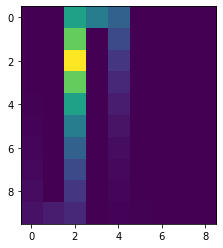

In [9]:
index = 20
plt.figure()
plt.imshow(sr_reps[index].reshape(*env.shape))
plt.show()

In [11]:
## successor representations
sr_reps = {}
SR = np.sum(sr_, axis = 0)
for index in range(SR.shape[0]):
    sr_reps[index] = SR[index]
    
for _ in range(5):
    env.random_start = True 
    input_dims = len(sr_reps[list(sr_reps.keys())[0]])
    
    sr_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    sr_agent = Agent(sr_network, state_representations=sr_reps)

    ex = expt(sr_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'sr_train_with_rec'
    directory = '../../Data/'
    filename  = 'mf_training.csv'

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename)

Episode: 0, Score: 9.96 (Running Avg:9.96) [0.009185791015625s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:-0.14449999999999247) [14.866067171096802s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:-0.26889999999999215) [15.164724349975586s]
Episode: 300, Score: 8.28 (Running Avg:3.1867000000000045) [11.825005292892456s]
Episode: 400, Score: 9.61 (Running Avg:8.851600000000001) [4.917551040649414s]
Episode: 500, Score: 9.79 (Running Avg:9.6627) [2.693711757659912s]
Episode: 600, Score: 9.53 (Running Avg:9.6602) [2.714580774307251s]
Episode: 700, Score: 9.73 (Running Avg:9.6905) [2.5004708766937256s]
Episode: 800, Score: 9.96 (Running Avg:9.7027) [2.417722463607788s]
Episode: 900, Score: 9.59 (Running Avg:9.699300000000001) [2.443984031677246s]
Episode: 1000, Score: 9.98 (Running Avg:9.704900000000002) [2.4054243564605713s]
Episode: 1100, Score: 9.67 (Running Avg:9.749899999999998) [2.1021816730499268s]
Episode: 1200, Score: 9.93 (Running Avg:9.727199999999998) [2.2573

Episode: 600, Score: -2.4999999999999907 (Running Avg:-0.3846999999999923) [15.284677743911743s]
Episode: 700, Score: 8.93 (Running Avg:0.07780000000000728) [14.782163381576538s]
Episode: 800, Score: 8.85 (Running Avg:8.7962) [5.334593772888184s]
Episode: 900, Score: 9.76 (Running Avg:9.674) [2.6489293575286865s]
Episode: 1000, Score: 10.0 (Running Avg:9.7211) [2.3215219974517822s]
Episode: 1100, Score: 9.86 (Running Avg:9.663400000000001) [2.7399039268493652s]
Episode: 1200, Score: 9.75 (Running Avg:9.687100000000001) [2.561375617980957s]
Episode: 1300, Score: 9.77 (Running Avg:9.7042) [2.4309921264648438s]
Episode: 1400, Score: 9.51 (Running Avg:9.7163) [2.352865219116211s]
Episode: 1500, Score: 9.83 (Running Avg:9.710899999999999) [2.384971857070923s]
Episode: 1600, Score: 9.78 (Running Avg:9.7393) [2.1979169845581055s]
Episode: 1700, Score: 9.91 (Running Avg:9.736699999999999) [2.2184672355651855s]
Episode: 1800, Score: 9.61 (Running Avg:9.7504) [2.119257926940918s]
Episode: 1900, 

Episode: 1300, Score: 9.86 (Running Avg:9.726600000000001) [2.2515411376953125s]
Episode: 1400, Score: 9.86 (Running Avg:9.7343) [2.198138475418091s]
Episode: 1500, Score: 9.97 (Running Avg:9.7289) [2.237849235534668s]
Episode: 1600, Score: 9.87 (Running Avg:9.7112) [2.3586461544036865s]
Episode: 1700, Score: 9.709999999999999 (Running Avg:9.7383) [2.1657121181488037s]
Episode: 1800, Score: 9.709999999999999 (Running Avg:9.7196) [2.2947938442230225s]
Episode: 1900, Score: 9.52 (Running Avg:9.740499999999999) [2.1456546783447266s]
Episode: 2000, Score: 9.64 (Running Avg:9.7157) [2.3255515098571777s]
Episode: 2100, Score: 9.83 (Running Avg:9.732000000000001) [2.2156412601470947s]
Episode: 2200, Score: 9.67 (Running Avg:9.7353) [2.1830668449401855s]
Episode: 2300, Score: 9.62 (Running Avg:9.7492) [2.0875144004821777s]
Episode: 2400, Score: 9.84 (Running Avg:9.751) [2.1051828861236572s]
Episode: 2500, Score: 9.82 (Running Avg:9.6989) [2.442978620529175s]
Episode: 2600, Score: 9.48 (Running

In [ ]:
print(ex.data['P_snap'][-1])

In [ ]:
from Utils.gridworld_plotting import *

In [ ]:
index = 5000-1
plot_pref_pol(env, ex.data['P_snap'][index])

In [ ]:
### testing 
df = pd.read_csv('../../Data/mf_training.csv')

for j in range(len(df)):
    print(i)
    i = int(j+130)
    line = df.iloc[i]
    if line['pass']=='pass':
        pass
    else:
        run_id    = line['run_id']
        env_type  = line['env_type']
        expt_type = line['expt_type']
        num_cells = line['Num_inputs']

        # make environment
        env = gym.make(env_type)
        # remap reward 
        env.set_reward({(15,15):10})

        # make network
        network = torch.load(f'../../Data/agents/{run_id}.pt')

        # get state representations
        if expt_type == 'onehot_train':
            print("Using Onehot Representation")
            state_reps = {}
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))

        elif expt_type == 'place_cell_train':
            print("Using Place Cell Representation")
            fs = line['PlaceCell_fieldsize']
            with open(f'../../Data/results/{run_id}_data.p', 'rb') as f:
                cell_centres = pickle.load(f)['place_cells']
            state_reps = {}
            pcs = PlaceCells(env.shape,num_cells=int(num_cells), field_size=fs, cell_centres=cell_centres)
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = pcs.get_activities([state])[0]

        if expt_type[0:8] == 'sr_train':
            print("Using Successor Representation")
            with open(f'../../modules/Agents/RepresentationLearning/SR_{env_type}.p', 'rb') as f:
                sr_ = pickle.load(f)

            state_reps = {}
            SR = np.sum(sr_, axis = 0)
            for index in range(SR.shape[0]):
                state_reps[index] = SR[index]

        # make agent
        agent = Agent(network, state_representations=state_reps)

        # make experiment
        ex = expt(agent,env)

        num_trials = 5000
        num_events = 250
        # run experiment
        ex.run(num_trials, num_events)

        # log results 
        expt_type = f'{expt_type[:-6]}_testing'
        directory = '../../Data/'
        filename  = 'mf_testing.csv'

        if expt_type == 'place_cell_train':
            ex.data['place_cells'] = place_cells.cell_centres

        extras = [run_id]

        ex.record_log(expt_type, env_type, num_trials, num_events, dir=directory, file=filename, extra=extras,
                     mock_log=False)


In [ ]:
print(expt_type[:-6])

In [ ]:
print(state_reps.keys())

In [ ]:
print(expt_type[0:8])

In [15]:
## with EC
### testing 
df = pd.read_csv('../../Data/mf_training.csv')

for j in range(len(df)):    
    i = int(j)
    if i ==0:
        pass
    line = df.iloc[i]
    if line['pass']=='pass':
        pass
    else:
        run_id    = line['run_id']
        env_type  = line['env_type']
        expt_type = line['expt_type']
        num_cells = line['Num_inputs']

        # make environment
        env = gym.make(env_type)
        # remap reward 
        env.set_reward({(15,15):10})

        # make network
        network = torch.load(f'../../Data/agents/{run_id}.pt')

        # get state representations
        if expt_type == 'onehot_train':
            print("Using Onehot Representation")
            state_reps = {}
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))

        elif expt_type == 'place_cell_train':
            print("Using Place Cell Representation")
            fs = line['PlaceCell_fieldsize']
            with open(f'../../Data/results/{run_id}_data.p', 'rb') as f:
                cell_centres = pickle.load(f)['place_cells']
            state_reps = {}
            pcs = PlaceCells(env.shape,num_cells=int(num_cells), field_size=fs, cell_centres=cell_centres)
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = pcs.get_activities([state])[0]

        if expt_type[0:8] == 'sr_train':
            print("Using Successor Representation")
            with open(f'../../modules/Agents/RepresentationLearning/SR_{env_type}.p', 'rb') as f:
                sr_ = pickle.load(f)

            state_reps = {}
            SR = np.sum(sr_, axis = 0)
            for index in range(SR.shape[0]):
                state_reps[index] = SR[index]
        
        # make memory
        memory = Memory(cache_limit=400, entry_size=env.action_space.n)
        # make agent
        agent = Agent(network, state_representations=state_reps, memory=memory)
        agent.get_action = agent.EC_action
        # make experiment
        ex = expt(agent,env)

        num_trials = 1000
        num_events = 250
        # run experiment
        ex.run(num_trials, num_events)

        # log results 
        expt_type = f'{expt_type[:-6]}_testing'
        directory = '../../Data/'
        filename  = 'ec_testing.csv'

        if expt_type == 'place_cell_train':
            ex.data['place_cells'] = place_cells.cell_centres

        extras = [run_id]

        ex.record_log(expt_type, env_type, num_trials, num_events, dir=directory, file=filename, extra=extras,
                     mock_log=False)

Using Onehot Representation


IndexError: index 15 is out of bounds for axis 0 with size 10

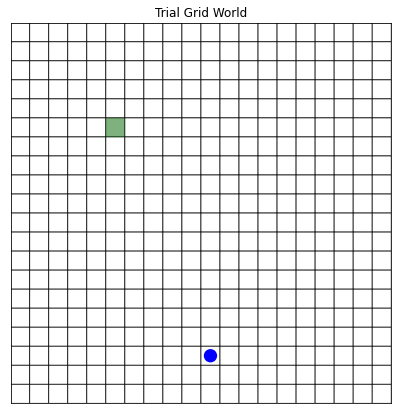

True
Using Onehot Representation
Episode: 0, Score: 8.43 (Running Avg:8.43) [0.16649603843688965s]
Episode: 100, Score: 9.62 (Running Avg:6.743200000000002) [49.24738836288452s]
Episode: 200, Score: 9.81 (Running Avg:9.668399999999998) [31.38600206375122s]
Episode: 300, Score: 9.629999999999999 (Running Avg:9.6735) [32.6553795337677s]
Episode: 400, Score: 9.23 (Running Avg:9.543099999999999) [36.593172788619995s]
Episode: 500, Score: 9.89 (Running Avg:9.520999999999999) [39.022159814834595s]
Episode: 600, Score: 9.87 (Running Avg:9.5469) [36.74689435958862s]
Episode: 700, Score: 10.0 (Running Avg:9.5162) [39.99858331680298s]
Episode: 800, Score: 9.87 (Running Avg:9.535499999999999) [38.37048649787903s]
Episode: 900, Score: 9.68 (Running Avg:9.267499999999998) [45.690115451812744s]
Logged with ID 28cc102a-eeb2-44f0-9d98-51b0ca1f93e6


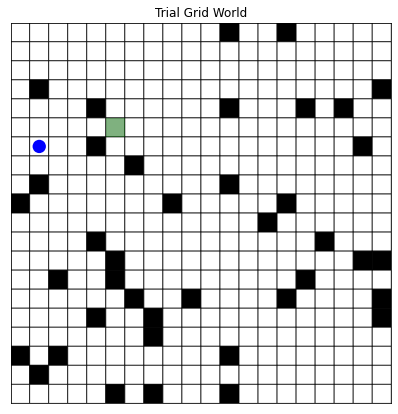

True
Using Onehot Representation
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.4768869876861572s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:-0.4171999999999923) [147.84608435630798s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:2.0887000000000056) [142.26633191108704s]
Episode: 300, Score: -2.4999999999999907 (Running Avg:4.587900000000004) [108.6198079586029s]
Episode: 400, Score: 9.709999999999999 (Running Avg:6.948900000000002) [69.26908206939697s]
Episode: 500, Score: 9.78 (Running Avg:6.691300000000002) [74.94378423690796s]
Episode: 600, Score: 9.66 (Running Avg:8.392900000000003) [47.57055711746216s]
Episode: 700, Score: 9.93 (Running Avg:9.0356) [34.52086114883423s]
Episode: 800, Score: 9.68 (Running Avg:8.175500000000001) [48.56498742103577s]
Episode: 900, Score: 9.95 (Running Avg:8.781200000000002) [39.73176622390747s]
Logged with ID e5e8320b-c72c-4cd6-a11c-f9c9374ada94


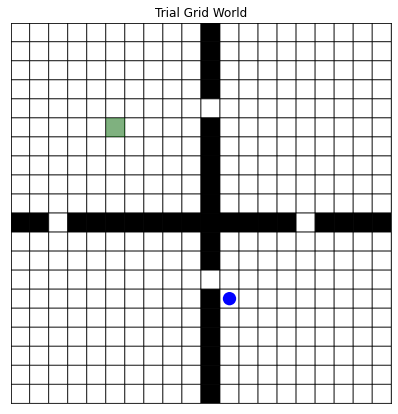

True
Using Onehot Representation
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.30640316009521484s]
Episode: 100, Score: -2.4999999999999907 (Running Avg:0.44360000000000704) [137.96962451934814s]
Episode: 200, Score: 9.5 (Running Avg:4.475100000000004) [111.74697232246399s]
Episode: 300, Score: 9.549999999999999 (Running Avg:5.367100000000002) [96.42025518417358s]
Episode: 400, Score: 9.87 (Running Avg:5.601600000000003) [94.12340521812439s]
Episode: 500, Score: 9.77 (Running Avg:4.933100000000003) [109.56217050552368s]
Episode: 600, Score: -2.4999999999999907 (Running Avg:6.9562000000000035) [70.94471406936646s]
Episode: 700, Score: 9.97 (Running Avg:6.5648000000000035) [79.51094555854797s]
Episode: 800, Score: 9.82 (Running Avg:8.325000000000001) [46.28526329994202s]
Episode: 900, Score: 9.59 (Running Avg:8.778900000000002) [41.351388454437256s]
Logged with ID 285d7755-a837-4806-970a-66829f2465d4


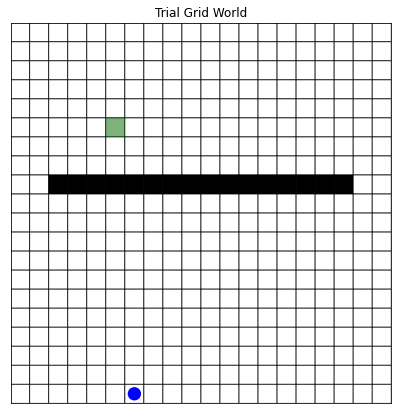

True
Using Onehot Representation
Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.9493389129638672s]
Episode: 100, Score: 9.6 (Running Avg:4.880700000000004) [98.54550123214722s]
Episode: 200, Score: 9.61 (Running Avg:6.976700000000002) [71.36368942260742s]
Episode: 300, Score: 9.87 (Running Avg:7.339600000000002) [65.95895457267761s]
Episode: 400, Score: 9.68 (Running Avg:8.649500000000002) [45.84587216377258s]
Episode: 500, Score: 9.53 (Running Avg:8.6899) [42.045044898986816s]
Episode: 600, Score: 9.79 (Running Avg:7.467600000000001) [63.24997162818909s]
Episode: 700, Score: 9.89 (Running Avg:8.422600000000003) [48.372864961624146s]
Episode: 800, Score: 9.92 (Running Avg:9.406799999999999) [30.845648288726807s]
Episode: 900, Score: 9.87 (Running Avg:9.4036) [31.114073514938354s]
Logged with ID 2cbbcdc2-49e7-45ed-a0d1-03fd18460811


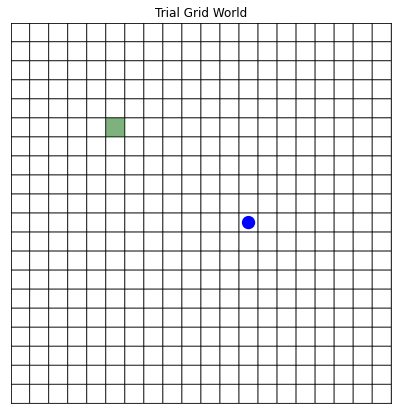

True
Using Place Cell Representation


NameError: name 'line' is not defined

In [18]:
for expt_type in ['onehot_train', 'place_cell_train', 'sr_train']:
    for i in range(4):
        env_type = f'gym_grid:gridworld-v{i+1}'
        # make environment
        env = gym.make(env_type)
        # remap reward 
        env.set_reward({(15,15):10})
        print(env.random_start)

        
        # get state representations
        if expt_type == 'onehot_train':
            print("Using Onehot Representation")
            state_reps = {}
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))

        elif expt_type == 'place_cell_train':
            print("Using Place Cell Representation")
            fs = line['PlaceCell_fieldsize']
            with open(f'../../Data/results/{run_id}_data.p', 'rb') as f:
                cell_centres = pickle.load(f)['place_cells']
            state_reps = {}
            pcs = PlaceCells(env.shape,num_cells=int(num_cells), field_size=fs, cell_centres=cell_centres)
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = pcs.get_activities([state])[0]

        if expt_type[0:8] == 'sr_train':
            print("Using Successor Representation")
            with open(f'../../modules/Agents/RepresentationLearning/SR_{env_type}.p', 'rb') as f:
                sr_ = pickle.load(f)

            state_reps = {}
            SR = np.sum(sr_, axis = 0)
            for index in range(SR.shape[0]):
                state_reps[index] = SR[index]
        
        input_dims = len(state_reps[0])
        # make network
        network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)#torch.load(f'../../Data/agents/{run_id}.pt')
        # make memory
        memory = Memory(cache_limit=400, entry_size=env.action_space.n)
        # make agent
        agent = Agent(network, state_representations=state_reps, memory=memory)
        agent.get_action = agent.EC_action
        # make experiment
        ex = expt(agent,env)

        num_trials = 1000
        num_events = 250
        # run experiment
        ex.run(num_trials, num_events)

        # log results 
        expt_label = f'{expt_type[:-6]}_testing'
        directory = '../../Data/'
        filename  = 'ec_testing.csv'

        if expt_type == 'place_cell_train':
            ex.data['place_cells'] = place_cells.cell_centres

        #extras = [run_id]

        ex.record_log(expt_label, env_type, num_trials, num_events, dir=directory, file=filename, extra=extras,
                     mock_log=False)